## Libs

In [2]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [3]:
%store -r data_IVV
data_IVV.head(2)

,Adj Close
Date,
2009-06-01,77.035706
2009-06-08,77.466110


array([<matplotlib.axes._subplots.AxesSubplot object at 0x108270908>],
      dtype=object)

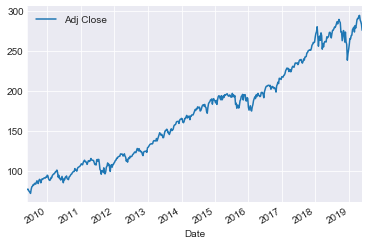

In [3]:
data_IVV.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_IVV)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.0224345 ],
       [0.02437194]])

In [7]:
type(dataset)

numpy.ndarray

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks, remaining 4 years for validation.

In [8]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [9]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [10]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [14]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

Epoch 1/2000
311/311 [==============================] - 2s 6ms/step - loss: 0.0786
Epoch 2/2000
311/311 [==============================] - 0s 177us/step - loss: 0.0626
Epoch 3/2000
311/311 [==============================] - 0s 178us/step - loss: 0.0492
Epoch 4/2000
311/311 [==============================] - 0s 196us/step - loss: 0.0379
Epoch 5/2000
311/311 [==============================] - 0s 208us/step - loss: 0.0289
Epoch 6/2000
311/311 [==============================] - 0s 194us/step - loss: 0.0221
Epoch 7/2000
311/311 [==============================] - 0s 179us/step - loss: 0.0175
Epoch 8/2000
311/311 [==============================] - 0s 182us/step - loss: 0.0149
Epoch 9/2000
311/311 [==============================] - 0s 207us/step - loss: 0.0139
Epoch 10/2000
311/311 [==============================] - 0s 185us/step - loss: 0.0138
Epoch 11/2000
311/311 [==============================] - 0s 190us/step - loss: 0.0140
Epoch 12/2000
311/311 [==============================] - 0s 185us

311/311 [==============================] - 0s 165us/step - loss: 1.2852e-04
Epoch 185/2000
311/311 [==============================] - 0s 166us/step - loss: 1.2851e-04
Epoch 186/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2850e-04
Epoch 187/2000
311/311 [==============================] - 0s 165us/step - loss: 1.2849e-04
Epoch 188/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2847e-04
Epoch 189/2000
311/311 [==============================] - 0s 169us/step - loss: 1.2846e-04
Epoch 190/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2845e-04
Epoch 191/2000
311/311 [==============================] - 0s 165us/step - loss: 1.2844e-04
Epoch 192/2000
311/311 [==============================] - 0s 161us/step - loss: 1.2843e-04
Epoch 193/2000
311/311 [==============================] - 0s 156us/step - loss: 1.2841e-04
Epoch 194/2000
311/311 [==============================] - 0s 156us/step - loss: 1.2840e-04
Epoch 195/2000

311/311 [==============================] - 0s 164us/step - loss: 1.2591e-04
Epoch 365/2000
311/311 [==============================] - 0s 160us/step - loss: 1.2589e-04
Epoch 366/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2588e-04
Epoch 367/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2586e-04
Epoch 368/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2584e-04
Epoch 369/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2583e-04
Epoch 370/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2581e-04
Epoch 371/2000
311/311 [==============================] - 0s 163us/step - loss: 1.2579e-04
Epoch 372/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2578e-04
Epoch 373/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2576e-04
Epoch 374/2000
311/311 [==============================] - 0s 152us/step - loss: 1.2575e-04
Epoch 375/2000

311/311 [==============================] - 0s 181us/step - loss: 1.2318e-04
Epoch 544/2000
311/311 [==============================] - 0s 185us/step - loss: 1.2317e-04
Epoch 545/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2315e-04
Epoch 546/2000
311/311 [==============================] - 0s 182us/step - loss: 1.2314e-04
Epoch 547/2000
311/311 [==============================] - 0s 183us/step - loss: 1.2313e-04
Epoch 548/2000
311/311 [==============================] - 0s 181us/step - loss: 1.2312e-04
Epoch 549/2000
311/311 [==============================] - 0s 186us/step - loss: 1.2310e-04
Epoch 550/2000
311/311 [==============================] - 0s 176us/step - loss: 1.2309e-04
Epoch 551/2000
311/311 [==============================] - 0s 178us/step - loss: 1.2308e-04
Epoch 552/2000
311/311 [==============================] - 0s 182us/step - loss: 1.2307e-04
Epoch 553/2000
311/311 [==============================] - 0s 185us/step - loss: 1.2305e-04
Epoch 554/2000

311/311 [==============================] - 0s 156us/step - loss: 1.2173e-04
Epoch 724/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2173e-04
Epoch 725/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2173e-04
Epoch 726/2000
311/311 [==============================] - 0s 155us/step - loss: 1.2173e-04
Epoch 727/2000
311/311 [==============================] - 0s 157us/step - loss: 1.2172e-04
Epoch 728/2000
311/311 [==============================] - 0s 155us/step - loss: 1.2172e-04
Epoch 729/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2172e-04
Epoch 730/2000
311/311 [==============================] - 0s 161us/step - loss: 1.2171e-04
Epoch 731/2000
311/311 [==============================] - 0s 155us/step - loss: 1.2171e-04
Epoch 732/2000
311/311 [==============================] - 0s 158us/step - loss: 1.2171e-04
Epoch 733/2000
311/311 [==============================] - 0s 157us/step - loss: 1.2171e-04
Epoch 734/2000

311/311 [==============================] - 0s 169us/step - loss: 1.3821e-04
Epoch 903/2000
311/311 [==============================] - 0s 161us/step - loss: 1.3278e-04
Epoch 904/2000
311/311 [==============================] - 0s 153us/step - loss: 1.8533e-04
Epoch 905/2000
311/311 [==============================] - 0s 153us/step - loss: 1.5898e-04
Epoch 906/2000
311/311 [==============================] - 0s 156us/step - loss: 2.5851e-04
Epoch 907/2000
311/311 [==============================] - 0s 162us/step - loss: 2.1764e-04
Epoch 908/2000
311/311 [==============================] - 0s 159us/step - loss: 3.7277e-04
Epoch 909/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1980e-04
Epoch 910/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1721e-04
Epoch 911/2000
311/311 [==============================] - 0s 161us/step - loss: 1.9532e-04
Epoch 912/2000
311/311 [==============================] - 0s 168us/step - loss: 1.2324e-04
Epoch 913/2000

311/311 [==============================] - 0s 201us/step - loss: 1.2163e-04
Epoch 1082/2000
311/311 [==============================] - 0s 199us/step - loss: 1.2163e-04
Epoch 1083/2000
311/311 [==============================] - 0s 181us/step - loss: 1.2163e-04
Epoch 1084/2000
311/311 [==============================] - 0s 173us/step - loss: 1.2163e-04
Epoch 1085/2000
311/311 [==============================] - 0s 171us/step - loss: 1.2163e-04
Epoch 1086/2000
311/311 [==============================] - 0s 171us/step - loss: 1.2164e-04
Epoch 1087/2000
311/311 [==============================] - 0s 177us/step - loss: 1.2164e-04
Epoch 1088/2000
311/311 [==============================] - 0s 168us/step - loss: 1.2164e-04
Epoch 1089/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2164e-04
Epoch 1090/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2164e-04
Epoch 1091/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2164e-04
Epoc

311/311 [==============================] - 0s 172us/step - loss: 1.2167e-04
Epoch 1260/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2168e-04
Epoch 1261/2000
311/311 [==============================] - 0s 166us/step - loss: 1.2168e-04
Epoch 1262/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2168e-04
Epoch 1263/2000
311/311 [==============================] - 0s 163us/step - loss: 1.2168e-04
Epoch 1264/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2168e-04
Epoch 1265/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2168e-04
Epoch 1266/2000
311/311 [==============================] - 0s 161us/step - loss: 1.2168e-04
Epoch 1267/2000
311/311 [==============================] - 0s 164us/step - loss: 1.2169e-04
Epoch 1268/2000
311/311 [==============================] - 0s 163us/step - loss: 1.2168e-04
Epoch 1269/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2168e-04
Epoc

311/311 [==============================] - 0s 179us/step - loss: 1.2262e-04
Epoch 1438/2000
311/311 [==============================] - 0s 184us/step - loss: 1.2328e-04
Epoch 1439/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2378e-04
Epoch 1440/2000
311/311 [==============================] - 0s 184us/step - loss: 1.2666e-04
Epoch 1441/2000
311/311 [==============================] - 0s 187us/step - loss: 1.2238e-04
Epoch 1442/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2175e-04
Epoch 1443/2000
311/311 [==============================] - 0s 187us/step - loss: 1.2150e-04
Epoch 1444/2000
311/311 [==============================] - 0s 184us/step - loss: 1.2169e-04
Epoch 1445/2000
311/311 [==============================] - 0s 203us/step - loss: 1.2177e-04
Epoch 1446/2000
311/311 [==============================] - 0s 188us/step - loss: 1.2152e-04
Epoch 1447/2000
311/311 [==============================] - 0s 188us/step - loss: 1.2161e-04
Epoc

311/311 [==============================] - 0s 174us/step - loss: 1.2161e-04
Epoch 1616/2000
311/311 [==============================] - 0s 159us/step - loss: 1.2161e-04
Epoch 1617/2000
311/311 [==============================] - 0s 161us/step - loss: 1.2161e-04
Epoch 1618/2000
311/311 [==============================] - 0s 165us/step - loss: 1.2161e-04
Epoch 1619/2000
311/311 [==============================] - 0s 172us/step - loss: 1.2161e-04
Epoch 1620/2000
311/311 [==============================] - 0s 172us/step - loss: 1.2161e-04
Epoch 1621/2000
311/311 [==============================] - 0s 170us/step - loss: 1.2161e-04
Epoch 1622/2000
311/311 [==============================] - 0s 166us/step - loss: 1.2161e-04
Epoch 1623/2000
311/311 [==============================] - 0s 172us/step - loss: 1.2161e-04
Epoch 1624/2000
311/311 [==============================] - 0s 166us/step - loss: 1.2161e-04
Epoch 1625/2000
311/311 [==============================] - 0s 167us/step - loss: 1.2161e-04
Epoc

311/311 [==============================] - 0s 155us/step - loss: 1.2165e-04
Epoch 1794/2000
311/311 [==============================] - 0s 152us/step - loss: 1.2165e-04
Epoch 1795/2000
311/311 [==============================] - 0s 152us/step - loss: 1.2165e-04
Epoch 1796/2000
311/311 [==============================] - 0s 151us/step - loss: 1.2165e-04
Epoch 1797/2000
311/311 [==============================] - 0s 156us/step - loss: 1.2165e-04
Epoch 1798/2000
311/311 [==============================] - 0s 155us/step - loss: 1.2166e-04
Epoch 1799/2000
311/311 [==============================] - 0s 155us/step - loss: 1.2165e-04
Epoch 1800/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2165e-04
Epoch 1801/2000
311/311 [==============================] - 0s 150us/step - loss: 1.2167e-04
Epoch 1802/2000
311/311 [==============================] - 0s 162us/step - loss: 1.2166e-04
Epoch 1803/2000
311/311 [==============================] - 0s 156us/step - loss: 1.2165e-04
Epoc

Epoch 1971/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2154e-04
Epoch 1972/2000
311/311 [==============================] - 0s 184us/step - loss: 1.2172e-04
Epoch 1973/2000
311/311 [==============================] - 0s 181us/step - loss: 1.2152e-04
Epoch 1974/2000
311/311 [==============================] - 0s 183us/step - loss: 1.2156e-04
Epoch 1975/2000
311/311 [==============================] - 0s 178us/step - loss: 1.2156e-04
Epoch 1976/2000
311/311 [==============================] - 0s 181us/step - loss: 1.2156e-04
Epoch 1977/2000
311/311 [==============================] - 0s 178us/step - loss: 1.2158e-04
Epoch 1978/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2156e-04
Epoch 1979/2000
311/311 [==============================] - 0s 179us/step - loss: 1.2156e-04
Epoch 1980/2000
311/311 [==============================] - 0s 175us/step - loss: 1.2157e-04
Epoch 1981/2000
311/311 [==============================] - 0s 185us/step - loss:

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [15]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 2.45 RMSE
Testing score: 4.45 RMSE


### Plotting and comparing original data, predictions, forecasts

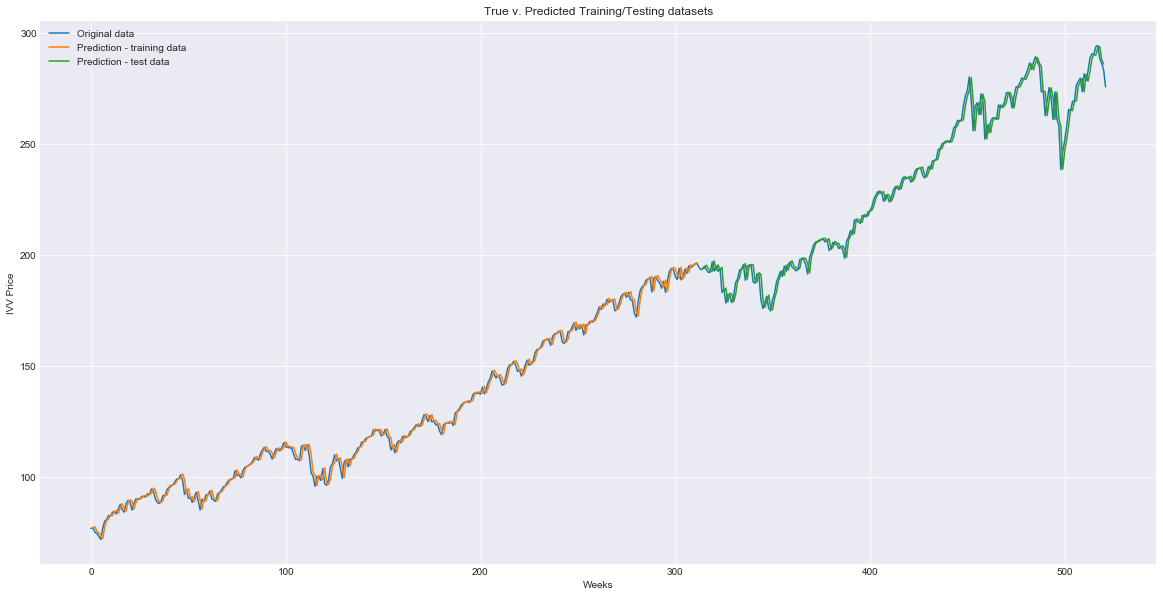

In [16]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('IVV Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()